# Some basic plots of attention patterns
The first results working with attention patterns over prompts.

In [1]:
from transformers import AutoTokenizer

from gptomics import functional as func
from gptomics import transformersio

In [2]:
modelname = "EleutherAI/gpt-neo-125M"

Running the function over a small prompt. We'll compare the token-by-token final output to the full context output to make sure I'm passing the `past_key_values` variable correctly.

In [3]:
small_prompt = "The quick brown fox jumped over the lazy"

In [45]:
att, fnout = func.attention_pattern(modelname, small_prompt)

In [46]:
import matplotlib.pyplot as plt

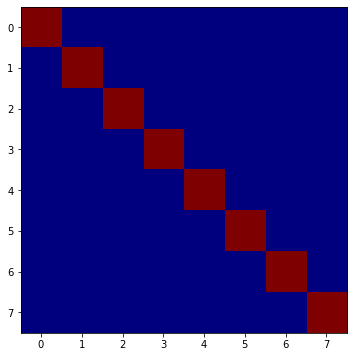

In [47]:
plt.figure(figsize=(7, 6))
plt.imshow(att[6][0, 4, :, :].data.cpu().numpy(), cmap="jet")

In [48]:
medium_prompt = (
    "We hold these truths to be self-evident, that all men are created equal,"
    " that they are endowed by their Creator with certain unalienable Rights,"
    " that among these are Life, Liberty and the pursuit of Happiness."
)

In [58]:
att, tokens = func.attention_pattern(modelname, medium_prompt)

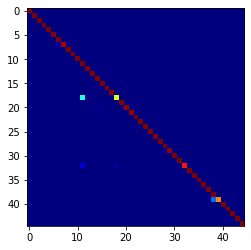

In [62]:
plt.imshow(att[6][0, 4, :, :].data.cpu().numpy(), cmap="jet")

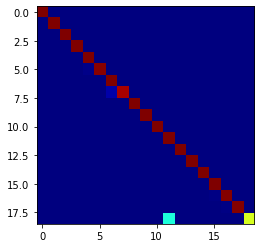

In [59]:
plt.imshow(att[6][0, 4, :19, :19].data.cpu().numpy(), cmap="jet")

In [51]:
tokens[18], tokens[11]

('Ġthat', 'Ġthat')

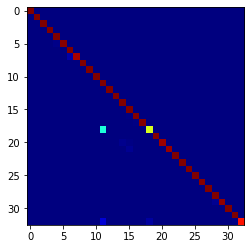

In [60]:
plt.imshow(att[6][0, 4, :33, :33].data.cpu().numpy(), cmap="jet")

In [53]:
tokens[32]

'Ġthat'

In [54]:
tokens[18]

'Ġthat'

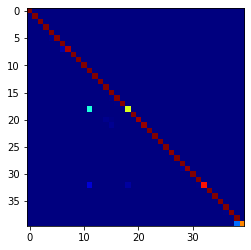

In [64]:
plt.imshow(att[6][0, 4, :40, :40].data.cpu().numpy(), cmap="jet")

In [66]:
tokens[38], tokens[39]

('ĠLiberty', 'Ġand')

In [67]:
with open("../texts/potter") as f:
    long_prompt = f.read()[:-1]

In [68]:
att, tokens = func.attention_pattern(modelname, long_prompt)

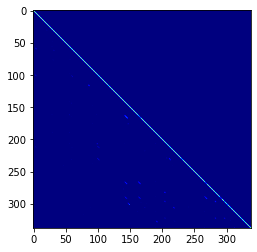

In [69]:
plt.imshow(att[6][0, 4, :, :].data.cpu().numpy(), cmap="jet")

In [77]:
att_ = att[6][0, 4, :, :].data.cpu().numpy().copy()
for i in range(att_.shape[0]):
    att_[i, i] = 0
np.unravel_index(np.argmax(att_), att_.shape)

(166, 145)

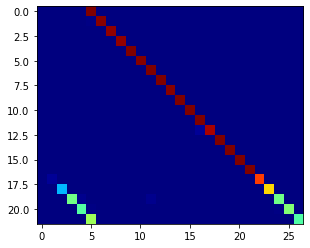

In [84]:
plt.imshow(att[6][0, 4, 145:167, 140:167].data.cpu().numpy(), cmap="jet")

In [89]:
tokens[142:146], tokens[163:167]

(['ĠThe', 'ĠD', 'urs', 'leys'], ['ĠThe', 'ĠD', 'urs', 'leys'])